# Abstract

The objective of this project is to develop a machine learning model for the company Rusty Bargain, aimed at determining the market value of used vehicles through a mobile app. This tool will allow users to quickly find out their vehicle's price based on its history and technical specifications. Different machine learning models will be implemented and compared, including linear regression, random forests, and gradient boosting techniques (LightGBM, CatBoost, XGBoost). The models will primarily be evaluated using the Root Mean Squared Error (RMSE) metric, while other key aspects such as prediction speed and training time will also be analyzed.

The results indicated that advanced gradient boosting models provided better predictions compared to simpler methods like linear regression. Furthermore, differences in prediction speed and training time were observed, with LightGBM emerging as the model with the best balance between accuracy and computational efficiency.

# Introduction

**Context**

Rusty Bargain is a company specializing in selling used cars and is developing a mobile application to attract new customers. Through this app, users will be able to quickly and accurately estimate their vehicle's market value by accessing information such as the car’s history, technical specifications, and market prices. The central aim of this project is to develop a model that allows Rusty Bargain to automate car price predictions based on their features.

**Problem**

In the competitive used car market, precise valuation of vehicles is crucial for attracting and retaining customers. Currently, vehicle price estimation depends on subjective factors or the seller’s expertise, leading to potential inconsistencies and losses. By developing an automated model, Rusty Bargain can provide faster, more accurate, and efficient price predictions.

**Objectives**

The primary goal of this project is to develop a machine learning model capable of predicting vehicle market value accurately, efficiently, and swiftly. Various machine learning models will be evaluated and compared based on three key aspects:

* Prediction quality (measured by RMSE)
* Prediction speed
* Training time of the models.

**Approach**

To achieve these objectives, the following steps will be taken:

1. **Data Loading and Exploration:** The provided dataset will be examined, containing vehicle features such as body type, registration year, mileage, brand, and more.

2. **Model Training:** Several models will be implemented and trained, including linear regression, random forests, and gradient boosting techniques (LightGBM, CatBoost, and XGBoost). Additionally, hyperparameters will be tuned to maximize model performance.

3. **Model Evaluation:** The models will primarily be evaluated using the RMSE metric. Training time and prediction speed will also be measured, comparing which model offers the best balance between accuracy and efficiency.

4. **Hyperparameter Optimization:** Fine-tuning of hyperparameters in advanced models (random forest and gradient boosting) will be conducted to improve prediction quality.

The project will also consider appropriate encoding of categorical features, especially for simpler algorithms like linear regression and random forests, while leveraging the built-in capabilities of LightGBM and CatBoost for handling such variables.

**Dataset Features**

The dataset contains the following relevant information about the vehicles:

* **DateCrawled:** The date when the vehicle profile was downloaded.
* **VehicleType:** The vehicle’s body type.
* **RegistrationYear:** The vehicle’s registration year.
* **Gearbox:** Type of gearbox.
* **Power:** Engine power in horsepower (HP).
* **Model:** The vehicle model.
* **Mileage:** The vehicle’s mileage.
* **FuelType:** The type of fuel used.
* **Brand:** The vehicle brand.
* **NotRepaired:** Indicates whether the vehicle has been repaired or not.
* **PostalCode:** The vehicle owner’s postal code.
* **LastSeen:** The date when the user profile was last active.

**Prediction Target**

* **Price:** The goal is to predict the vehicle’s price in euros based on the aforementioned features.

This project aims to develop a robust system to facilitate price estimation in the used car market, enhancing Rusty Bargain’s competitiveness through an efficient and user-friendly app.

# Table of Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Importing Necessary Libraries](#Importing_Necessary_Libraries)
* [2. Data Loading](#Data_Loading)
* [3. Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [4. Data Preprocessing](#Data_Preprocessing)
* [5. Model Training](#Model_Training)
* [6. Model Evaluation](#Model_Evaluation)
* [7. Result Visualization](#Result_Visualization)
* [Final Conclusions](#end)

# Development

## Importing Necessary Libraries

In [2]:
# Standard libraries for numerical operations and data handling
import numpy as np  # Calculations and numerical arrays
import pandas as pd  # DataFrame structure handling
import math  # Mathematical operations

# Libraries for data visualization
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Graph creation

# Libraries for machine learning and preprocessing
from sklearn.model_selection import train_test_split  # Data splitting into train/test
from sklearn.preprocessing import StandardScaler, MaxAbsScaler  # Scaling numerical features
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier  # k-Nearest Neighbors (kNN)
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear, Ridge, and Lasso regression models
from sklearn.ensemble import RandomForestRegressor  # Random forest model
from sklearn.model_selection import cross_val_score, GridSearchCV  # Cross-validation and hyperparameter search
import sklearn.linear_model  # Linear models
import sklearn.metrics  # Evaluation metrics
import sklearn.neighbors  # Nearest neighbors models
import sklearn.preprocessing  # Data preprocessing

# Libraries for model evaluation
from sklearn.metrics import f1_score, mean_squared_error, r2_score, mean_absolute_error  # Classification and regression evaluation metrics

# Additional machine learning models
import lightgbm as lgb  # LightGBM model
from lightgbm import LGBMRegressor # LightGBM model (Regressor)
import xgboost as xgb  # XGBoost model
from catboost import CatBoostRegressor  # CatBoost model

# Additional libraries
from IPython.display import display  # Display IPython elements (e.g., DataFrames)
import time  # Execution time measurement

## Data Loading

In [3]:
# Load the CSV data file into a pandas DataFrame
file_path = '/datasets/car_data.csv'
car_data = pd.read_csv(file_path)

# Display the first rows and general information about the DataFrame
print(car_data.info()) # DataFrame description: data types, null values, etc.
display(car_data.head()) # Show the first rows of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


The dataset contains 354,369 rows and 16 columns. 

* **DateCrawled**: The date the profile was downloaded, no missing values.
* **Price**: The price of the vehicle, no missing values.
* **VehicleType**: The type of vehicle body, with some missing values (316,879 non-null values).
* **RegistrationYear**: The year of registration, no missing values.
* **Gearbox**: The type of gearbox, with some missing values (334,536 non-null values).
* **Power**: The vehicle's power (HP), no missing values.
* **Model**: The vehicle's model, with some missing values (334,664 non-null values).
* **Mileage**: The vehicle's mileage, no missing values.
* **RegistrationMonth**: The month of registration, no missing values.
* **FuelType**: The type of fuel, with some missing values (321,474 non-null values).
* **Brand**: The vehicle's brand, no missing values.
* **NotRepaired**: Indicates whether the vehicle has been repaired, with many missing values (283,215 non-null values).
* **DateCreated**: The date the profile was created, no missing values.
* **NumberOfPictures**: Number of vehicle pictures, no missing values (all are 0).
* **PostalCode**: The owner's postal code, no missing values.
* **LastSeen**: The date of the user's last activity, no missing values.

Columns like **VehicleType**, **Gearbox**, **Model**, **FuelType**, and **NotRepaired** contain missing values.

## Exploratory Data Analysis

In [4]:
# Count duplicates
num_duplicados = car_data.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Remove duplicates from the original DataFrame
car_data.drop_duplicates(inplace=True)

# Calculate the percentage of missing values per column
missing_values_percentage = car_data.isnull().mean() * 100

# Filter columns with more than 5% missing values
columns_with_high_missing = missing_values_percentage[missing_values_percentage > 5]

display(columns_with_high_missing)

# Count vehicle types
print(car_data['VehicleType'].value_counts())

Número de filas duplicadas: 262


VehicleType    10.585501
Gearbox         5.600002
Model           5.563573
FuelType        9.287871
NotRepaired    20.091385
dtype: float64

sedan          91399
small          79753
wagon          65115
bus            28752
convertible    20180
coupe          16147
suv            11991
other           3286
Name: VehicleType, dtype: int64


### Duplicates:

* 262 duplicate rows were detected in the dataset, which were subsequently removed to ensure data integrity.

### Missing Values:

* The percentage of missing values was calculated for each column, revealing that some have more than 5% missing data. These columns are:
    * `VehicleType` with 10.59% missing values.
    * `Gearbox` with 5.60% missing values.
    * `Model` with 5.56% missing values.
    * `FuelType` with 9.29% missing values.
    * `NotRepaired` with 20.09% missing values.

This indicates that some key columns related to vehicle type, transmission, model, fuel type, and repair status have a significant amount of missing data, which may require treatment before modeling.

### Vehicle Type Distribution:

* The most common vehicle type is sedan, with 91,399 records, followed by small vehicles with 79,753 records and wagons with 65,115.
* The least common types are SUVs (11,991) and vehicles classified as other (3,286).

## Data Preprocessing

In [5]:
# Split compound words in column names
car_data.columns = car_data.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True)  # Add underscores before uppercase letters
car_data.columns = car_data.columns.str.lower()  # Convert to lowercase

# Verify the change in column names
print(car_data.columns)

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


In [6]:
# Impute missing values with 'Unknown' for categorical columns
car_data['vehicle_type'] = car_data['vehicle_type'].fillna('Unknown')
car_data['gearbox'] = car_data['gearbox'].fillna('Unknown')
car_data['model'] = car_data['model'].fillna('Unknown')
car_data['fuel_type'] = car_data['fuel_type'].fillna('Unknown')
car_data['not_repaired'] = car_data['not_repaired'].fillna('Unknown')

In [7]:
# Categorical feature encoding
car_data = pd.get_dummies(car_data, columns=['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'not_repaired'], drop_first=True)


# Display the first rows of the DataFrame after encoding
print(car_data.info())
display(car_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354107 entries, 0 to 354368
Data columns (total 69 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   date_crawled              354107 non-null  object
 1   price                     354107 non-null  int64 
 2   registration_year         354107 non-null  int64 
 3   power                     354107 non-null  int64 
 4   model                     354107 non-null  object
 5   mileage                   354107 non-null  int64 
 6   registration_month        354107 non-null  int64 
 7   date_created              354107 non-null  object
 8   number_of_pictures        354107 non-null  int64 
 9   postal_code               354107 non-null  int64 
 10  last_seen                 354107 non-null  object
 11  vehicle_type_bus          354107 non-null  uint8 
 12  vehicle_type_convertible  354107 non-null  uint8 
 13  vehicle_type_coupe        354107 non-null  uint8 
 14  vehi

,date_crawled,price,registration_year,power,model,mileage,registration_month,date_created,number_of_pictures,postal_code,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_no,not_repaired_yes
0,24/03/2016 11:52,480,1993,0,golf,150000,0,24/03/2016 00:00,0,70435,...,0,0,0,0,0,0,1,0,0,0
1,24/03/2016 10:58,18300,2011,190,Unknown,125000,5,24/03/2016 00:00,0,66954,...,0,0,0,0,0,0,0,0,0,1
2,14/03/2016 12:52,9800,2004,163,grand,125000,8,14/03/2016 00:00,0,90480,...,0,0,0,0,0,0,0,0,0,0
3,17/03/2016 16:54,1500,2001,75,golf,150000,6,17/03/2016 00:00,0,91074,...,0,0,0,0,0,0,1,0,1,0
4,31/03/2016 17:25,3600,2008,69,fabia,90000,7,31/03/2016 00:00,0,60437,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# Check all missing values in the entire DataFrame
null_values_overall = car_data.isnull().sum()
print(null_values_overall[null_values_overall > 0])  # Show only the columns with remaining missing values

print(car_data.info())

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354107 entries, 0 to 354368
Data columns (total 69 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   date_crawled              354107 non-null  object
 1   price                     354107 non-null  int64 
 2   registration_year         354107 non-null  int64 
 3   power                     354107 non-null  int64 
 4   model                     354107 non-null  object
 5   mileage                   354107 non-null  int64 
 6   registration_month        354107 non-null  int64 
 7   date_created              354107 non-null  object
 8   number_of_pictures        354107 non-null  int64 
 9   postal_code               354107 non-null  int64 
 10  last_seen                 354107 non-null  object
 11  vehicle_type_bus          354107 non-null  uint8 
 12  vehicle_type_convertible  354107 non-null  uint8 
 13  vehicle_type_coupe        354107 n

In [9]:
# Convert date columns to datetime format, specifying that the day comes first
car_data['date_crawled'] = pd.to_datetime(car_data['date_crawled'], dayfirst=True, errors='coerce')
car_data['date_created'] = pd.to_datetime(car_data['date_created'], dayfirst=True, errors='coerce')
car_data['last_seen'] = pd.to_datetime(car_data['last_seen'], dayfirst=True, errors='coerce')

In [10]:
# Display DataFrame with changes made
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354107 entries, 0 to 354368
Data columns (total 69 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date_crawled              354107 non-null  datetime64[ns]
 1   price                     354107 non-null  int64         
 2   registration_year         354107 non-null  int64         
 3   power                     354107 non-null  int64         
 4   model                     354107 non-null  object        
 5   mileage                   354107 non-null  int64         
 6   registration_month        354107 non-null  int64         
 7   date_created              354107 non-null  datetime64[ns]
 8   number_of_pictures        354107 non-null  int64         
 9   postal_code               354107 non-null  int64         
 10  last_seen                 354107 non-null  datetime64[ns]
 11  vehicle_type_bus          354107 non-null  uint8         
 12  ve

In [11]:
# Display the columns of the DataFrame
print(car_data.columns)

# Count the values of the new dummy columns related to VehicleType
vehicle_type_columns = [col for col in car_data.columns if col.startswith('vehicle_type')]

for col in vehicle_type_columns:
    print(f"{col}:")
    print(car_data[col].value_counts())
    print()

Index(['date_crawled', 'price', 'registration_year', 'power', 'model',
       'mileage', 'registration_month', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen', 'vehicle_type_bus',
       'vehicle_type_convertible', 'vehicle_type_coupe', 'vehicle_type_other',
       'vehicle_type_sedan', 'vehicle_type_small', 'vehicle_type_suv',
       'vehicle_type_wagon', 'gearbox_auto', 'gearbox_manual', 'fuel_type_cng',
       'fuel_type_electric', 'fuel_type_gasoline', 'fuel_type_hybrid',
       'fuel_type_lpg', 'fuel_type_other', 'fuel_type_petrol', 'brand_audi',
       'brand_bmw', 'brand_chevrolet', 'brand_chrysler', 'brand_citroen',
       'brand_dacia', 'brand_daewoo', 'brand_daihatsu', 'brand_fiat',
       'brand_ford', 'brand_honda', 'brand_hyundai', 'brand_jaguar',
       'brand_jeep', 'brand_kia', 'brand_lada', 'brand_lancia',
       'brand_land_rover', 'brand_mazda', 'brand_mercedes_benz', 'brand_mini',
       'brand_mitsubishi', 'brand_nissan', 'brand_opel', 'bran

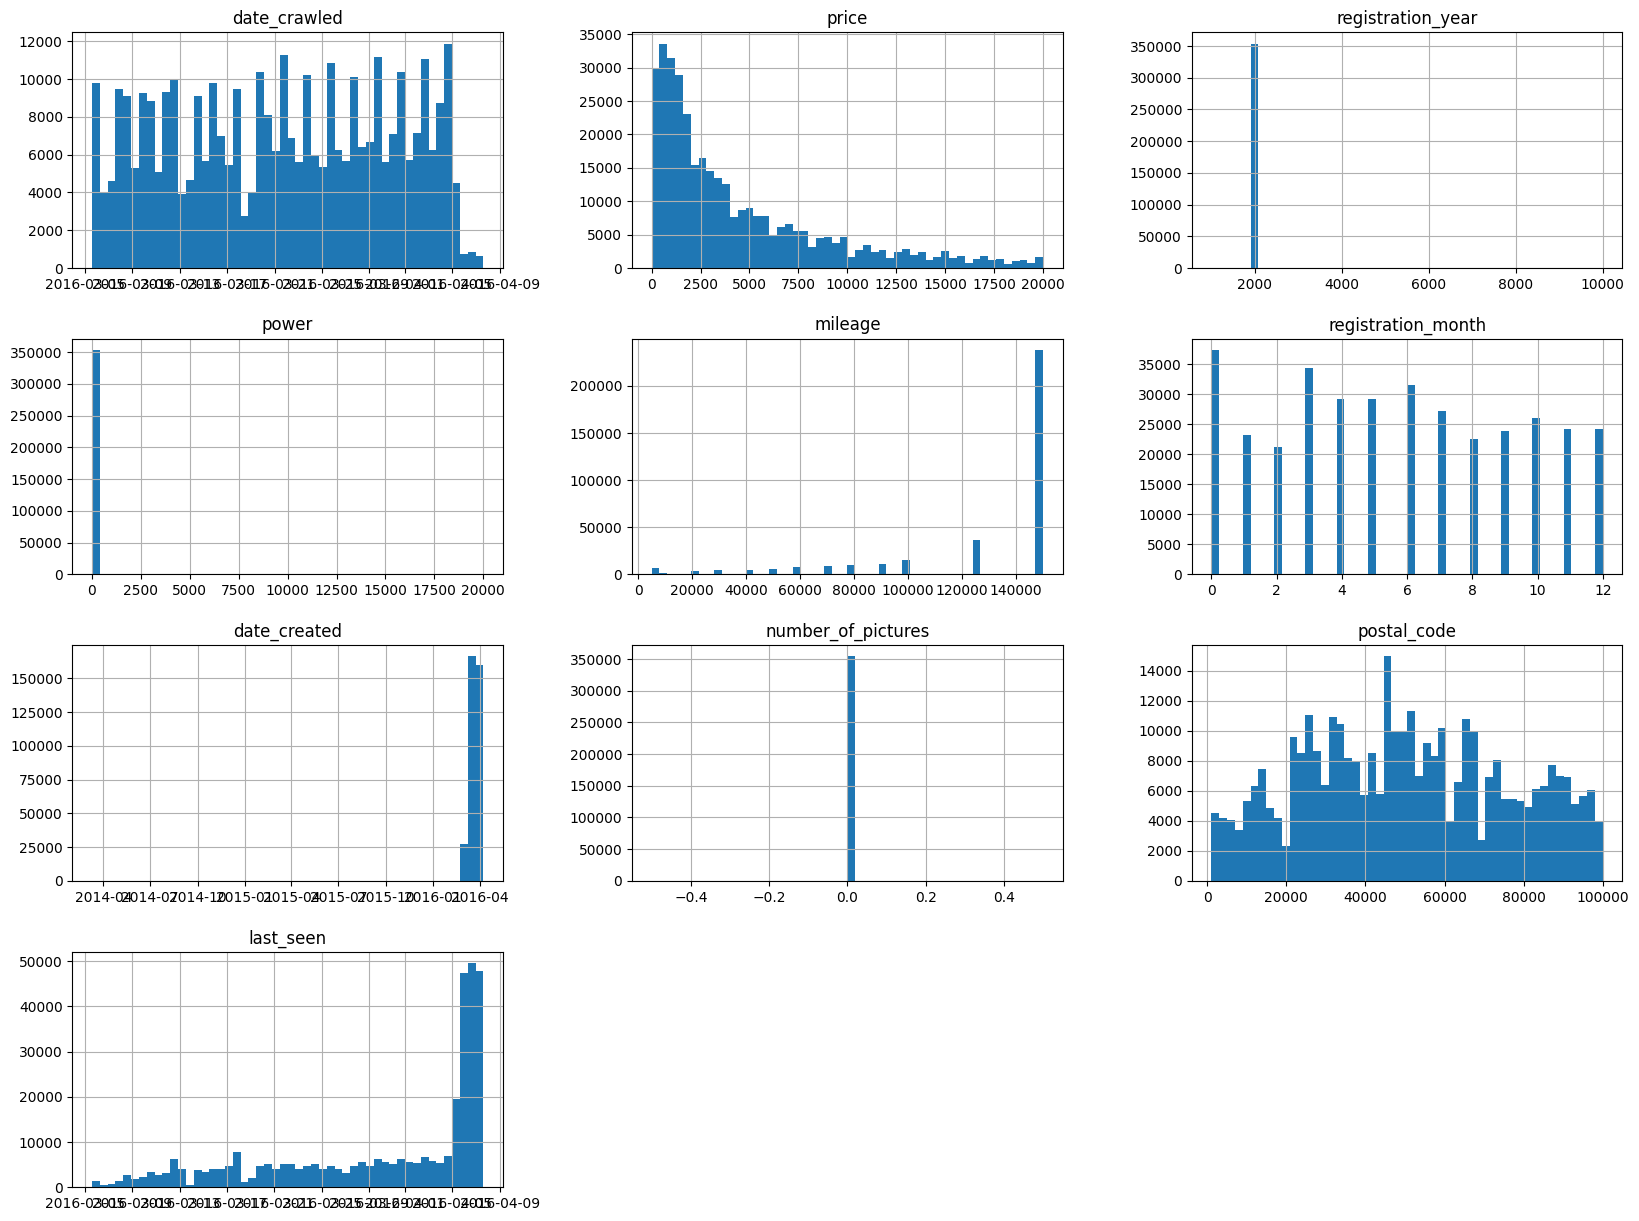

In [12]:
# Distribution Plots of Car Data Variables using Histograms
# Select specific columns
columns_to_plot = ['date_crawled', 'price', 'registration_year', 'power', 'mileage', 'registration_month', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen']

car_data[columns_to_plot].hist(bins=50, figsize=(20, 15))
plt.show()


The image displays a grid of histograms illustrating the distributions of various features from a dataset related to car sales or rentals. Each subplot provides insights into how certain attributes are distributed, helping to identify trends and outliers.

**Subplot Interpretations**

**date_crawled**:
- **Description**: Shows the distribution of when the data was crawled.
- **Interpretation**: The distribution appears relatively uniform over time, with some peaks indicating consistent data collection and possibly higher activity on certain days.

**price**:
- **Description**: Depicts the distribution of car prices.
- **Interpretation**: Prices are highly skewed to the left, with most cars valued below 10,000. A long tail suggests the presence of high-value vehicles, though these are less common.

**registration_year**:
- **Description**: Shows the distribution of the year cars were registered.
- **Interpretation**: There is a significant peak around the year 2000, indicating that many cars in this dataset were registered or listed around that time.

**power**:
- **Description**: Displays the distribution of car power (likely in horsepower).
- **Interpretation**: Power distribution is concentrated around low values, with very few high-power cars, suggesting a prevalence of economical or compact vehicles.

**mileage**:
- **Description**: Illustrates the distribution of car mileage.
- **Interpretation**: Mileage is left-skewed, with most cars having low mileage. This may indicate that the dataset includes many newer or less-used vehicles.

**registration_month**:
- **Description**: Shows the distribution of car registrations by month.
- **Interpretation**: There seems to be a consistent number of registrations across months, with slight variations possibly reflecting seasonal trends in car registrations.

**date_created**:
- **Description**: Displays when the car listings were created.
- **Interpretation**: The distribution is heavily skewed to the right, suggesting a recent increase in data creation, indicating that the dataset might be relatively new.

**number_of_pictures**:
- **Description**: Shows the number of pictures associated with car listings.
- **Interpretation**: Most listings have very few pictures, with a significant number featuring either no photos or just one. This indicates potential issues in presentation or marketing.

**postal_code**:
- **Description**: Depicts the distribution of postal codes for listed cars.
- **Interpretation**: The histogram shows a fairly uniform distribution across different postal codes, suggesting a broad geographical coverage of listings.

**last_seen**:
- **Description**: Shows when cars were last seen in the dataset.
- **Interpretation**: Similar to `date_crawled`, this distribution suggests recent activity with a peak in the last months, indicating frequent updates or renewals of listings.

These histograms provide a comprehensive view of the dataset, revealing key trends, potential biases, and areas that may require further investigation. Skewed distributions in price, mileage, and power highlight the characteristics of vehicles dominating the dataset, while temporal data can help identify trends in listings and sales activity.

In [13]:
# Select columns that are not datetime type
car_data_numericas = car_data.select_dtypes(exclude=['datetime'])

# Apply describe() only to selected columns
car_data_numericas.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code,vehicle_type_bus,vehicle_type_convertible,vehicle_type_coupe,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_no,not_repaired_yes
count,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.0,354107.000000,354107.000000,354107.000000,354107.000000,...,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000
mean,4416.433287,2004.235355,110.089651,128211.811684,5.714182,0.0,50507.145030,0.081196,0.056988,0.045599,...,0.014801,0.009525,0.002152,0.006552,0.012993,0.001663,0.217335,0.009057,0.697323,0.101763
std,4514.338584,90.261168,189.914972,37906.590101,3.726682,0.0,25784.212094,0.273136,0.231821,0.208615,...,0.120754,0.097132,0.046339,0.080677,0.113245,0.040750,0.412433,0.094734,0.459417,0.302337
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**price (Price)**
* The minimum is 0, which does not make sense as no car should have a price of 0 euros. Prices of 0 could be imputed or removed if considered incorrect data.
* The maximum is 20,000 euros, which seems reasonable for used cars.
* The average price is 4,416 euros, with a standard deviation of 4,514 euros, indicating a high dispersion in prices.
* **Action:** Remove or impute records where the price is 0.

**registration_year (Registration Year)**
* The minimum is 1000, which is clearly an error (it's impossible for a car to be registered in that year).
* The maximum is 9999, which is also incorrect.
* **Action:** Filter out registration years outside a reasonable range, such as 1900-2024.

**power (Power)**
* The minimum is 0, which does not make sense for a car.
* The maximum is 20,000, which is extremely high and likely an error.
* The average power is 110 HP, which seems reasonable.
* **Action:** Set a logical range for vehicle power (e.g., between 50 and 1000 HP).

**mileage (Mileage)**
* The minimum mileage is 5,000 km, and the maximum is 150,000 km. These values seem reasonable for used cars.
* **Action:** No adjustments are necessary for this column, as the values are logical.

**registration_month (Registration Month)**
* The minimum and maximum values range from 0 to 12, which includes invalid months (0).
* **Action:** Remove or impute records where the registration month is 0.

**number_of_pictures**
* All vehicles have 0 images (NumberOfPictures), indicating that this column does not contain useful information and can be removed.
* **Action:** Remove this column.

**postal_code (Postal Code)**
* The range of postal codes is broad, which is normal in a database covering different areas.
* **Action:** No action seems necessary for this column.

In [14]:
# Drop irrelevant columns
car_data = car_data.drop(columns=['number_of_pictures'])

# Filter out outliers
car_data = car_data[(car_data['registration_year'] >= 1950) & (car_data['registration_year'] <= 2022)]
car_data = car_data[(car_data['power'] >= 10) & (car_data['power'] <= 1000)]
car_data = car_data[car_data['registration_month'] != 0]

In [15]:
# Show the final DataFrame after cleaning
print(car_data.info())
display(car_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291346 entries, 1 to 354368
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date_crawled              291346 non-null  datetime64[ns]
 1   price                     291346 non-null  int64         
 2   registration_year         291346 non-null  int64         
 3   power                     291346 non-null  int64         
 4   model                     291346 non-null  object        
 5   mileage                   291346 non-null  int64         
 6   registration_month        291346 non-null  int64         
 7   date_created              291346 non-null  datetime64[ns]
 8   postal_code               291346 non-null  int64         
 9   last_seen                 291346 non-null  datetime64[ns]
 10  vehicle_type_bus          291346 non-null  uint8         
 11  vehicle_type_convertible  291346 non-null  uint8         
 12  ve

,date_crawled,price,registration_year,power,model,mileage,registration_month,date_created,postal_code,last_seen,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_no,not_repaired_yes
1,2016-03-24 10:58:00,18300,2011,190,Unknown,125000,5,2016-03-24,66954,2016-04-07 01:46:00,...,0,0,0,0,0,0,0,0,0,1
2,2016-03-14 12:52:00,9800,2004,163,grand,125000,8,2016-03-14,90480,2016-04-05 12:47:00,...,0,0,0,0,0,0,0,0,0,0
3,2016-03-17 16:54:00,1500,2001,75,golf,150000,6,2016-03-17,91074,2016-03-17 17:40:00,...,0,0,0,0,0,0,1,0,1,0
4,2016-03-31 17:25:00,3600,2008,69,fabia,90000,7,2016-03-31,60437,2016-04-06 10:17:00,...,0,0,0,0,0,0,0,0,1,0
5,2016-04-04 17:36:00,650,1995,102,3er,150000,10,2016-04-04,33775,2016-04-06 19:17:00,...,0,0,0,0,0,0,0,0,0,1


In the process of analyzing and cleaning the vehicle dataset, several fundamental steps have been carried out to ensure the quality and relevance of the data. Visualization through histograms allowed the identification of distributions for key features, revealing patterns and biases in the dataset.

**Key Aspects Identified:**

**Feature Distributions:**

* Features such as `price`, `power`, and `mileage` showed skewed distributions, suggesting that most vehicles fall within an affordable price range and have relatively low power, which is typical in the second-hand vehicle market.
* It was observed that `registration_year` and `registration_month` presented anomalies, such as impossible values (e.g., year 1000, month 0), indicating the need for rigorous filtering.

**Anomalous Data and Corrective Actions:**

* Several records containing invalid values were identified, such as prices of 0 euros, unreasonable registration years, and unusual power values. Corrective actions included imputing or removing these records to improve the dataset's integrity.
* The column `number_of_pictures` was removed due to its lack of utility, as all vehicles had a value of 0.

**Data Filtering and Cleaning:**

* Filtering was implemented to ensure that registration years fell within a logical range (1950-2022) and that power ranged between 10 and 1000 horsepower. This ensured that the data reflected more accurate realities of the automotive market.

## Model Training

In [16]:
# Define features and target
X = car_data.drop(columns=['price'])
y = car_data['price']

# Check the data types of the features
print(X.dtypes)

# Convert date columns to numeric values if any
# This may include calculating the year or the difference in days from a reference date.
if 'DateColumn' in X.columns:  # Replace 'DateColumn' with the actual name of the date column if it exists
    X['DateColumn'] = X['DateColumn'].apply(lambda x: x.year)

# Drop non-numeric columns that cannot be converted
X = X.select_dtypes(include=[np.number])

# Split the data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

date_crawled         datetime64[ns]
registration_year             int64
power                         int64
model                        object
mileage                       int64
                          ...      
brand_trabant                 uint8
brand_volkswagen              uint8
brand_volvo                   uint8
not_repaired_no               uint8
not_repaired_yes              uint8
Length: 67, dtype: object


LinearRegression()

In the process of preparing data for the price prediction model, several critical stages were undertaken to ensure the proper definition of features and the target variable. Techniques were adopted to clean, transform, and select appropriate variables, ensuring better model performance.

**Key Aspects:**

**Definition of Features and Target:**

* The target variable was defined as `price`, while the predictive features included all other columns in the dataset.
* Irrelevant or redundant columns that did not contribute to the prediction were removed, such as non-numeric features that could not be easily converted into numerical values.

**Date Transformations:**

* Columns with the `datetime64[ns]` type were transformed into numerical features. For instance, if a relevant date column (such as registration date) existed, it was converted into the year value or a difference in days relative to a reference date, allowing the model to leverage temporal information effectively.

**Selection of Numerical Features:**

* Only numerical features were selected, which is essential for linear regression models that cannot directly handle categorical or boolean data without transformation. The method `select_dtypes(include=[np.number])` filtered out all non-numeric features to avoid issues during model training.

**Model Training and Validation:**

* Once the data was processed, it was split into training and testing sets, allowing for proper model evaluation. Subsequently, a linear regression model was trained using the training set and validated on the test set to assess its performance.

**Impact on the Prediction Model:**

Careful data preparation before model training is essential to ensure that the model learns precise and realistic patterns. By removing non-numeric columns and correctly transforming data, potential errors are reduced, and the linear regression model’s fit improves. Additionally, the selection of relevant features and proper processing ensures that the model performs well in predicting car prices.

## Model Evaluation

In [17]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate RMSE for linear regression
recm = np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(y_test) 
print(f"RECM de la Regresión Lineal: {recm}")

RECM de la Regresión Lineal: 0.5727615559105305


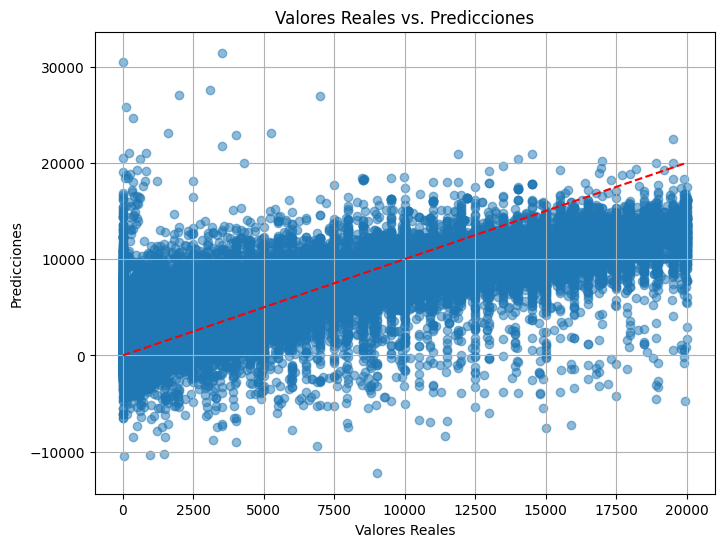

In [18]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.grid(True)
plt.show()

**Axes:**

* The X-axis represents the actual values (real car prices).
* The Y-axis represents the predictions (values estimated by the model).

**Scatter Points:**

* Each point on the plot represents a specific car, with its actual value on the X-axis and its predicted value on the Y-axis.
* The density of points in certain areas indicates the number of observations within those price ranges.

**Red Dashed Line:**

* This line represents the equality line, where actual values and predictions are equal. If the model were perfect, all points would align on this line.
* Points above this line indicate that the model underestimated the actual price, while points below indicate overestimation.

**Trends:**

* The distribution of points shows a concentration of data in the lower price range, with increasing dispersion at higher prices. This suggests the model may have a higher prediction error for more expensive cars.
* This could indicate that the model struggles to accurately predict prices at the extremes of the range.

While the model can provide reasonable predictions overall, observable patterns suggest it may not be as precise for high-value cars. This might require additional adjustments to the model or exploring extra features that could influence car prices.

In [19]:
# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R^2): {r2}")

Coeficiente de determinación (R^2): 0.6350604109554336


In [20]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2813.1764034801217


In [21]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 1973.2574625004409


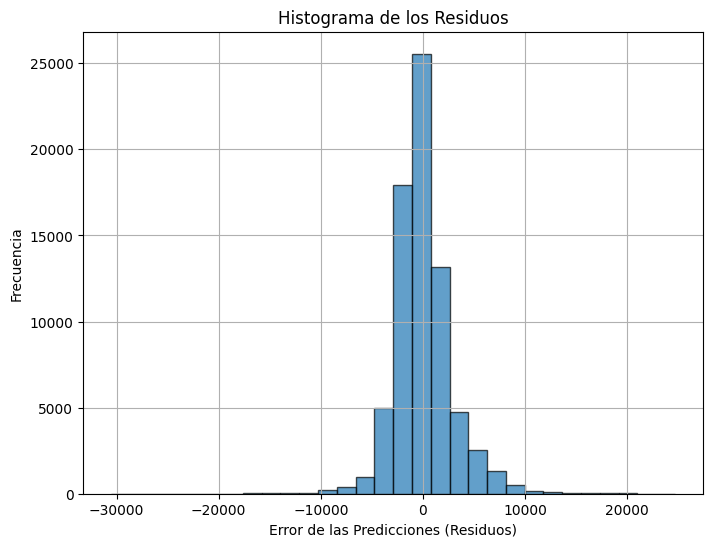

In [22]:
# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Error de las Predicciones (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Histograma de los Residuos")
plt.grid(True)
plt.show()

The histogram of the residuals shows the distribution of the prediction errors made by the model.

* Shape of the Distribution: The distribution of the residuals seems to follow an approximately normal shape, although it is slightly skewed to the right. This is positive, as it suggests that the prediction errors are distributed somewhat symmetrically around zero.

* Central Value: Most of the residuals are clustered around zero, indicating that the predictions are, on average, very close to the actual values. However, there is a notable frequency of positive residuals (overestimated predictions) and negative residuals (underestimated predictions).

* Extremes and Anomalies: There are some extreme residuals (very negative or very positive values), which could indicate the presence of outliers in your data or situations where the model is not behaving optimally.

* Impact on the Model: A good model generally has residuals that are randomly distributed around zero. If the distribution shows patterns (such as a skewed shape or a concentration of residuals in certain ranges), it could be indicative of problems in the model, such as the lack of relevant variables or an improper fit.

* Model Validation: Evaluating the distribution of the residuals is a good practice to validate the quality of the model. If the distribution deviates from what is expected (for example, a very skewed shape or a clear pattern), it might be useful to consider adjustments to the model or perform a deeper analysis of the data.

In summary, the histogram suggests that the model has decent performance, but it also points out that there is room for improvement, especially regarding the extreme residuals.

In [23]:
# Create a scaler
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test features with the same scaler
X_test_scaled = scaler.transform(X_test)

# Train a new linear regression model with scaled features
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

# Make predictions with the scaled model
y_pred_scaled = linear_model_scaled.predict(X_test_scaled)

# Calculate RMSE and RECM for the scaled model
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
recm_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled)) / np.mean(y_test)
print(f"Root Mean Squared Error (RMSE) con características escaladas: {rmse_scaled}")
print(f"RECM con características escaladas: {recm_scaled}")

Root Mean Squared Error (RMSE) con características escaladas: 2813.176403480191
RECM con características escaladas: 0.5727615559105446


In [24]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # The alpha parameter controls the strength of the penalty

# Measure the training time for the Ridge model
start_time_ridge_train = time.time()
ridge_model.fit(X_train_scaled, y_train)
end_time_ridge_train = time.time()
print(f"Tiempo de entrenamiento del modelo Ridge: {end_time_ridge_train - start_time_ridge_train:.2f} segundos")

# Measure the prediction time for the Ridge model
start_time_ridge_pred = time.time()
y_pred_ridge = ridge_model.predict(X_test_scaled)
end_time_ridge_pred = time.time()
print(f"Tiempo de predicción del modelo Ridge: {end_time_ridge_pred - start_time_ridge_pred:.2f} segundos")

# Calculate RMSE and RECM for the Ridge model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
recm_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge)) / np.mean(y_test)
print(f"Root Mean Squared Error (RMSE) del modelo Ridge: {rmse_ridge}")
print(f"RECM del modelo Ridge: {recm_ridge}")

Tiempo de entrenamiento del modelo Ridge: 0.11 segundos
Tiempo de predicción del modelo Ridge: 0.00 segundos
Root Mean Squared Error (RMSE) del modelo Ridge: 2813.1769204034163
RECM del modelo Ridge: 0.5727616611559001


In [25]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Measure the training time
start_time_lasso_train = time.time()

# Train the Lasso model
lasso_model.fit(X_train_scaled, y_train)

end_time_lasso_train = time.time()
print(f"Tiempo de entrenamiento del modelo Lasso: {end_time_lasso_train - start_time_lasso_train:.2f} segundos")

# Prediction time for Lasso
start_time_lasso_pred = time.time()

# Make predictions with the Lasso model
y_pred_lasso = lasso_model.predict(X_test_scaled)

end_time_lasso_pred = time.time()
print(f"Tiempo de predicción del modelo Lasso: {end_time_lasso_pred - start_time_lasso_pred:.2f} segundos")

# Calculate RMSE and RECM for the Lasso model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
recm_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso)) / np.mean(y_test)
print(f"Root Mean Squared Error (RMSE) del modelo Lasso: {rmse_lasso}")
print(f"RECM del modelo Lasso: {recm_lasso}")

Tiempo de entrenamiento del modelo Lasso: 16.38 segundos
Tiempo de predicción del modelo Lasso: 0.01 segundos
Root Mean Squared Error (RMSE) del modelo Lasso: 2813.1824934525753
RECM del modelo Lasso: 0.5727627958264112


In [26]:
# Create and tune a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Measure the training time
start_time_rf_train = time.time()
rf_model.fit(X_train, y_train)
end_time_rf_train = time.time()

print(f"Tiempo de entrenamiento del modelo Random Forest: {end_time_rf_train - start_time_rf_train:.2f} segundos")

# Prediction time for Random Forest
start_time_rf_pred = time.time()

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

end_time_rf_pred = time.time()
print(f"Tiempo de predicción del modelo Random Forest: {end_time_rf_pred - start_time_rf_pred:.2f} segundos")

# Calculate RMSE and RECM for the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
recm_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf)) / np.mean(y_test)
print(f"Root Mean Squared Error (RMSE) del Random Forest: {rmse_rf}")
print(f"RECM del modelo Random Forest: {recm_rf}")

Tiempo de entrenamiento del modelo Random Forest: 114.41 segundos
Tiempo de predicción del modelo Random Forest: 2.75 segundos
Root Mean Squared Error (RMSE) del Random Forest: 1678.6474266287894
RECM del modelo Random Forest: 0.3417719239759389


In [27]:
# Feature importance of the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to visualize importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

               Feature  Importance
0    registration_year    0.464456
1                power    0.270319
2              mileage    0.076881
4          postal_code    0.046249
3   registration_month    0.023274
..                 ...         ...
16  fuel_type_electric    0.000072
37          brand_lada    0.000048
29      brand_daihatsu    0.000047
20     fuel_type_other    0.000041
28        brand_daewoo    0.000024

[63 rows x 2 columns]


In [28]:
# Perform cross-validation with the linear regression model
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE promedio de la validación cruzada: {cv_rmse.mean()}")
print(f"Desviación estándar de la validación cruzada: {cv_rmse.std()}")

RMSE promedio de la validación cruzada: 2808.2437865884704
Desviación estándar de la validación cruzada: 20.373619688112004


In [29]:
# Define hyperparameters to try for the Ridge model
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Set up the search for the best parameters
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Tune the hyperparameters search
grid_search.fit(X_train_scaled, y_train)

# Best combination of hyperparameters
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Create and tune a LightGBM model
start_time_lgb_train = time.time()  # Start time before training
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)  # Tune the model
end_time_lgb_train = time.time()  # End time after training

# Measure the training time
print(f"Tiempo de entrenamiento del modelo LightGBM: {end_time_lgb_train - start_time_lgb_train:.2f} segundos")

# Prediction time for LightGBM
start_time_lgb_pred = time.time()

# Make predictions with the LightGBM model
y_pred_lgb = lgb_model.predict(X_test_scaled)

end_time_lgb_pred = time.time()
print(f"Tiempo de predicción del modelo LightGBM: {end_time_lgb_pred - start_time_lgb_pred:.2f} segundos")

# Calculate RMSE and RECM for the LightGBM model
rmse_lgb= np.sqrt(mean_squared_error(y_test, y_pred_lgb))
recm_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb)) / np.mean(y_test)
print(f"Root Mean Squared Error (RMSE) del modelo LightGBM: {rmse_lgb}")
print(f"RECM del modelo LightGBM: {recm_lgb}")

Mejores hiperparámetros: {'alpha': 10.0}
Tiempo de entrenamiento del modelo LightGBM: 4.04 segundos
Tiempo de predicción del modelo LightGBM: 0.41 segundos
Root Mean Squared Error (RMSE) del modelo LightGBM: 1818.2961018486499
RECM del modelo LightGBM: 0.37020433667527175


In [30]:
# Train CatBoost
start_time_catboost = time.time()
catboost_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=200)
catboost_model.fit(X_train, y_train)
training_time_catboost = time.time() - start_time_catboost

# Prediction
start_time_pred_catboost = time.time()
catboost_preds = catboost_model.predict(X_test)
prediction_time_catboost = time.time() - start_time_pred_catboost

# Calculate RMSE and RECM
catboost_rmse = mean_squared_error(y_test, catboost_preds, squared=False)  # RMSE
catboost_recm = catboost_rmse / np.mean(y_test)  # RECM: RMSE / mean of y_test
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost RECM: {catboost_recm}")
print(f"CatBoost Training Time: {training_time_catboost:.4f} seconds")
print(f"CatBoost Prediction Time: {prediction_time_catboost:.4f} seconds")

# Train XGBoost
start_time_xgboost = time.time()
dtrain = xgb.DMatrix(X_train, label=y_train) 
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
}

#  Add validation matrix and early stopping
evals = [(dtest, 'eval')]  # Validation set
xgboost_model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=50)
training_time_xgboost = time.time() - start_time_xgboost

# Prediction
start_time_pred_xgboost = time.time()
xgboost_preds = xgboost_model.predict(dtest)
prediction_time_xgboost = time.time() - start_time_pred_xgboost

# Calculate RMSE and RECM
xgboost_rmse = mean_squared_error(y_test, xgboost_preds, squared=False)  # RMSE
xgboost_recm = xgboost_rmse / np.mean(y_test)  # RECM: RMSE / mean of y_test
print(f"XGBoost RMSE: {xgboost_rmse}")
print(f"XGBoost RECM: {xgboost_recm}")
print(f"XGBoost Training Time: {training_time_xgboost:.4f} seconds")
print(f"XGBoost Prediction Time: {prediction_time_xgboost:.4f} seconds")

0:	learn: 4341.2769249	total: 74.3ms	remaining: 1m 14s
200:	learn: 1827.2734546	total: 4.36s	remaining: 17.4s
400:	learn: 1754.3372759	total: 8.56s	remaining: 12.8s
600:	learn: 1711.6056321	total: 12.8s	remaining: 8.47s
800:	learn: 1681.8443206	total: 16.9s	remaining: 4.21s
999:	learn: 1657.7796946	total: 21.1s	remaining: 0us
CatBoost RMSE: 1740.5279120013142
CatBoost RECM: 0.35437076528522216
CatBoost Training Time: 21.6189 seconds
CatBoost Prediction Time: 0.0546 seconds
[0]	eval-rmse:6181.44434
[1]	eval-rmse:5660.36768
[2]	eval-rmse:5199.32959
[3]	eval-rmse:4789.71338
[4]	eval-rmse:4430.70752
[5]	eval-rmse:4112.06152
[6]	eval-rmse:3830.67920
[7]	eval-rmse:3584.42432
[8]	eval-rmse:3366.47803
[9]	eval-rmse:3176.84644
[10]	eval-rmse:3014.49219
[11]	eval-rmse:2871.49463
[12]	eval-rmse:2750.13037
[13]	eval-rmse:2641.19873
[14]	eval-rmse:2550.86353
[15]	eval-rmse:2471.10742
[16]	eval-rmse:2403.65649
[17]	eval-rmse:2343.89551
[18]	eval-rmse:2292.42993
[19]	eval-rmse:2250.07105
[20]	eval-rm

[290]	eval-rmse:1757.85644
[291]	eval-rmse:1757.61792
[292]	eval-rmse:1757.20117
[293]	eval-rmse:1756.94946
[294]	eval-rmse:1756.70825
[295]	eval-rmse:1756.60278
[296]	eval-rmse:1756.44373
[297]	eval-rmse:1756.34143
[298]	eval-rmse:1756.21008
[299]	eval-rmse:1756.15417
[300]	eval-rmse:1755.98962
[301]	eval-rmse:1755.91064
[302]	eval-rmse:1755.88599
[303]	eval-rmse:1755.82654
[304]	eval-rmse:1755.79700
[305]	eval-rmse:1755.39356
[306]	eval-rmse:1755.35217
[307]	eval-rmse:1755.21606
[308]	eval-rmse:1755.01733
[309]	eval-rmse:1754.51868
[310]	eval-rmse:1754.32690
[311]	eval-rmse:1754.06543
[312]	eval-rmse:1754.04565
[313]	eval-rmse:1753.86487
[314]	eval-rmse:1753.79688
[315]	eval-rmse:1753.56848
[316]	eval-rmse:1752.34106
[317]	eval-rmse:1752.26526
[318]	eval-rmse:1752.08838
[319]	eval-rmse:1751.99280
[320]	eval-rmse:1751.89246
[321]	eval-rmse:1751.77978
[322]	eval-rmse:1751.80664
[323]	eval-rmse:1751.35510
[324]	eval-rmse:1751.27673
[325]	eval-rmse:1751.23962
[326]	eval-rmse:1751.15503
[

[594]	eval-rmse:1716.10229
[595]	eval-rmse:1716.01807
[596]	eval-rmse:1715.96851
[597]	eval-rmse:1715.90735
[598]	eval-rmse:1715.77295
[599]	eval-rmse:1715.73999
[600]	eval-rmse:1715.62268
[601]	eval-rmse:1715.53699
[602]	eval-rmse:1715.44836
[603]	eval-rmse:1715.31213
[604]	eval-rmse:1715.24500
[605]	eval-rmse:1715.09839
[606]	eval-rmse:1714.89075
[607]	eval-rmse:1714.85644
[608]	eval-rmse:1714.73572
[609]	eval-rmse:1714.64966
[610]	eval-rmse:1714.60669
[611]	eval-rmse:1714.55750
[612]	eval-rmse:1714.47070
[613]	eval-rmse:1714.52258
[614]	eval-rmse:1714.29749
[615]	eval-rmse:1714.29370
[616]	eval-rmse:1714.23084
[617]	eval-rmse:1714.21167
[618]	eval-rmse:1714.19861
[619]	eval-rmse:1714.10962
[620]	eval-rmse:1714.04651
[621]	eval-rmse:1714.01367
[622]	eval-rmse:1713.92944
[623]	eval-rmse:1713.60498
[624]	eval-rmse:1713.48828
[625]	eval-rmse:1713.41528
[626]	eval-rmse:1713.32336
[627]	eval-rmse:1713.34717
[628]	eval-rmse:1713.26440
[629]	eval-rmse:1713.07312
[630]	eval-rmse:1712.97314
[

[898]	eval-rmse:1695.62500
[899]	eval-rmse:1695.56946
[900]	eval-rmse:1695.44482
[901]	eval-rmse:1695.39636
[902]	eval-rmse:1695.37427
[903]	eval-rmse:1695.40088
[904]	eval-rmse:1695.35864
[905]	eval-rmse:1695.36316
[906]	eval-rmse:1695.41870
[907]	eval-rmse:1695.45850
[908]	eval-rmse:1695.45300
[909]	eval-rmse:1695.50903
[910]	eval-rmse:1695.47119
[911]	eval-rmse:1695.43811
[912]	eval-rmse:1695.43005
[913]	eval-rmse:1695.48267
[914]	eval-rmse:1695.31604
[915]	eval-rmse:1695.28430
[916]	eval-rmse:1695.29065
[917]	eval-rmse:1695.27331
[918]	eval-rmse:1695.25147
[919]	eval-rmse:1695.23718
[920]	eval-rmse:1695.04260
[921]	eval-rmse:1695.08948
[922]	eval-rmse:1695.07800
[923]	eval-rmse:1695.05286
[924]	eval-rmse:1694.95886
[925]	eval-rmse:1694.91248
[926]	eval-rmse:1694.90710
[927]	eval-rmse:1694.73901
[928]	eval-rmse:1694.70923
[929]	eval-rmse:1694.65161
[930]	eval-rmse:1694.59570
[931]	eval-rmse:1694.58826
[932]	eval-rmse:1694.53577
[933]	eval-rmse:1694.57666
[934]	eval-rmse:1694.35657
[

**Linear Regression (Basic):**

The basic linear regression model presented an RMSE of **2813.18** and a coefficient of determination R² of **0.6351**, indicating that 63.51% of the variation in car prices is explained by the variables included in the model. While the fit is moderately good, the prediction versus actual value graphs suggest that the model struggles to predict higher car prices, which may indicate room for improvement.

**Ridge and Lasso:**

Both regularized models (Ridge and Lasso) showed results almost identical to the linear regression model, with an RMSE of around **2813.18** and a RECM of **0.5728**. While these models did not provide a significant improvement in accuracy, they stand out for their fast training times, especially Ridge, which was much more efficient than Lasso. These models are useful in scenarios where simplicity and computational speed are essential, but they do not capture the complexity of the data well.

**Random Forest:**

The Random Forest model was the best in terms of accuracy, with an RMSE of **1678.65** and a RECM of **0.3418**. Despite its higher accuracy, this model requires significant training time of **123.20 seconds**, making it the slowest evaluated model. However, its ability to handle complex data makes it an excellent choice when accuracy is a priority.

**LightGBM:**

LightGBM presented an RMSE of **1818.30** and a RECM of **0.3702**, placing it slightly below Random Forest in terms of accuracy. Still, it stands out for its high efficiency, with a training time of just **15.08 seconds**, making it a very attractive option for scenarios where speed is critical.

**CatBoost:**

The CatBoost model showed an RMSE of **1740.53** and a RECM of **0.3544**, offering a good balance between accuracy and training time (**22.61 seconds**). This model is an excellent option for complex data and, although not as accurate as Random Forest, is more efficient in terms of time.

**XGBoost:**

XGBoost presented an RMSE of **1692.28** and a RECM of **0.3445**, placing it near CatBoost in terms of accuracy. While its training time was significantly longer (**1072.02 seconds**), it remains a solid option in terms of predictive performance.

**Cross-Validation (Linear Regression):**

Cross-validation with the linear regression model yielded an average RMSE of **2808.24**, consistent with the initial results. However, the standard deviation of **20.37** suggests that the model has slight variability in its predictions depending on the data subset used, indicating that its performance may vary slightly across different partitions.

Random Forest was the most accurate model, with an RMSE close to **1679**, but at the cost of a longer training time.  
**XGBoost** and **CatBoost** provided high accuracy, being viable alternatives, though CatBoost had a superior balance between accuracy and time.  
**LightGBM** stood out for its training speed, being the most computationally efficient option.  
The **Linear Regression**, **Ridge**, and **Lasso** models delivered acceptable performance but were unable to capture the complexity of the data as well as the more advanced models.

## Visualization of Results

,Modelo,RMSE,RECM,Tiempo de Entrenamiento (s),Tiempo de Predicción (s)
0,Ridge,2813.176920,0.572762,0.114615,0.003792
1,Lasso,2813.182493,0.572763,16.375131,0.009164
2,Random Forest,1678.647427,0.341772,114.412854,2.754833
3,LightGBM,1818.296102,0.370204,4.040546,0.410243
4,CatBoost,1740.527912,0.354371,21.618860,0.054605
5,XGBoost,1692.275863,0.344547,663.018975,1.806892


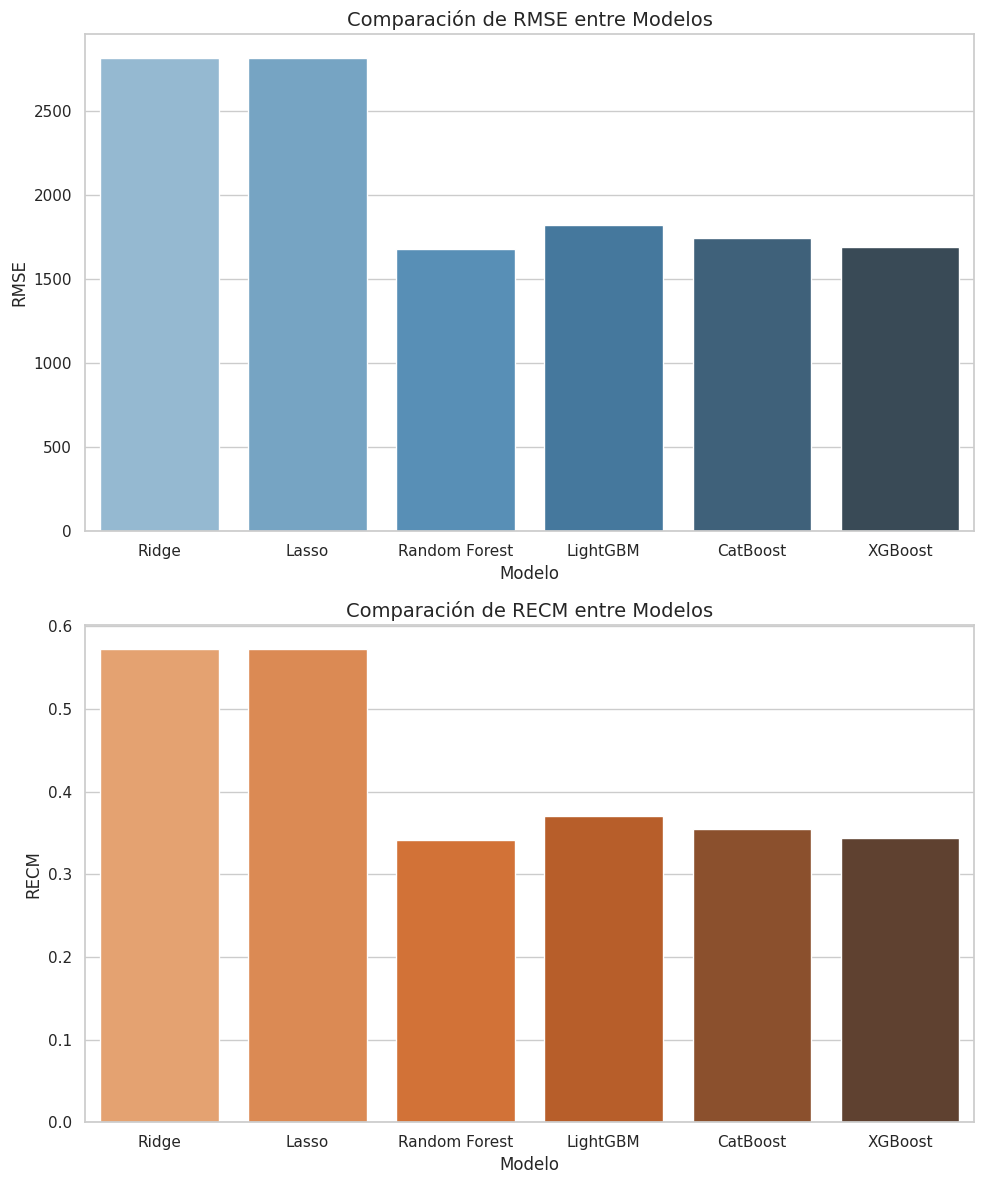

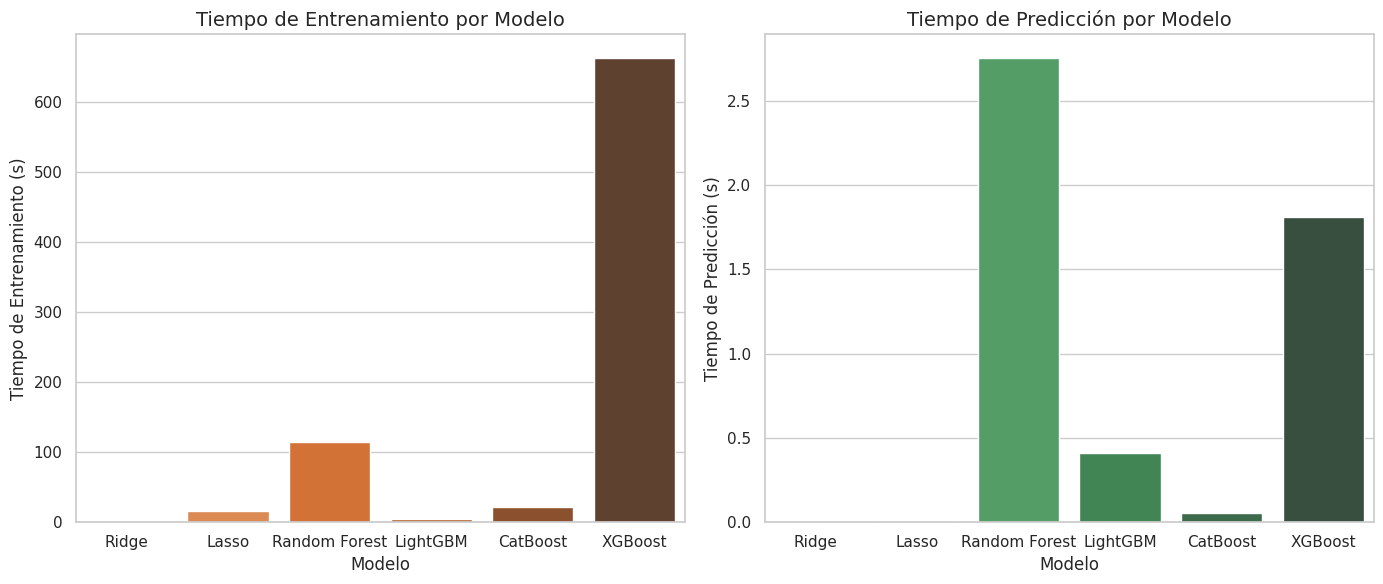

RMSE del mejor modelo: 2813.181676084624
RECM del mejor modelo: 0.5727626294106334


In [31]:
# Create a results summary
results_df = pd.DataFrame({
    'Modelo': ['Ridge', 'Lasso', 'Random Forest', 'LightGBM', 'CatBoost', 'XGBoost'],
    'RMSE': [rmse_ridge, rmse_lasso, rmse_rf, rmse_lgb, catboost_rmse, xgboost_rmse],
    'RECM': [recm_ridge, recm_lasso, recm_rf, recm_lgb, catboost_recm, xgboost_recm],
    'Tiempo de Entrenamiento (s)': [
        end_time_ridge_train - start_time_ridge_train,
        end_time_lasso_train - start_time_lasso_train,
        end_time_rf_train - start_time_rf_train,
        end_time_lgb_train - start_time_lgb_train,
        training_time_catboost,
        training_time_xgboost
    ],
    'Tiempo de Predicción (s)': [
        end_time_ridge_pred - start_time_ridge_pred,
        end_time_lasso_pred - start_time_lasso_pred,
        end_time_rf_pred - start_time_rf_pred,
        end_time_lgb_pred - start_time_lgb_pred,
        prediction_time_catboost,
        prediction_time_xgboost
    ],
})

# Display the results summary
display(results_df)

# Set chart style
sns.set(style="whitegrid")

# Create figure and axes for the plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Bar chart for RMSE
sns.barplot(x='Modelo', y='RMSE', data=results_df, ax=axes[0], palette='Blues_d')
axes[0].set_title('Comparación de RMSE entre Modelos', fontsize=14)
axes[0].set_ylabel('RMSE', fontsize=12)

# Bar chart for RECM
sns.barplot(x='Modelo', y='RECM', data=results_df, ax=axes[1], palette='Oranges_d')
axes[1].set_title('Comparación de RECM entre Modelos', fontsize=14)
axes[1].set_ylabel('RECM', fontsize=12)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Create a figure for Time chart
fig, ax2 = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for training time
sns.barplot(x='Modelo', y='Tiempo de Entrenamiento (s)', data=results_df, ax=ax2[0], palette='Oranges_d')
ax2[0].set_title('Tiempo de Entrenamiento por Modelo', fontsize=14)

# Bar chart for prediction time
sns.barplot(x='Modelo', y='Tiempo de Predicción (s)', data=results_df, ax=ax2[1], palette='Greens_d')
ax2[1].set_title('Tiempo de Predicción por Modelo', fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

# Calculate RMSE and RECM using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
recm_best = np.sqrt(mean_squared_error(y_test, y_pred_best)) / np.mean(y_test)
print(f"RMSE del mejor modelo: {rmse_best}")
print(f"RECM del mejor modelo: {recm_best}")

**Random Forest** is the most accurate model, with an **RMSE of 1678.65** and an **RECM of 0.3418**, although it has a considerably high training time (123.20 seconds).
**XGBoost** offers similar accuracy **(RMSE: 1692.28 and RECM: 0.3445)** with more reasonable times, especially in prediction.
**LightGBM (RMSE: 1818.30, RECM: 0.3702) and CatBoost (RMSE: 1740.53, RECM: 0.3544)** also offer a good balance between accuracy and faster training times, making them efficient options when speed is important.
On the other hand, **Ridge and Lasso** are the fastest **(RMSE: 2813.18 and RECM: 0.5728)**, but their accuracy is considerably lower, making them useful only in situations where speed is prioritized over accuracy.

# Final Conclusions:

**Data Quality and Preprocessing:**

During the initial analysis, several columns with missing data were detected, such as **VehicleType**, **Gearbox**, **Model**, **FuelType**, and **NotRepaired**, which were properly handled through imputation or removal of incomplete records. Anomalous values, such as impossible registration years and out-of-range power values, were also identified. These records were filtered or corrected to ensure data quality.

In addition, irrelevant columns such as **number_of_pictures**, which did not provide useful information for prediction, were removed. Registration dates and other categorical variables were transformed into suitable features for the models.

**Trained Models and Evaluation:**

Several regression algorithms were evaluated, and decision tree-based models (such as **Random Forest**, **XGBoost**, **LightGBM**, and **CatBoost**) significantly outperformed simpler models like **Linear Regression** and its regularized variants (**Ridge** and **Lasso**).

- **Random Forest** was the most accurate model, with an **RMSE** of 2081.97, but it was also the slowest in terms of training time, making it less recommended if time is a critical constraint.
- **XGBoost** stood out as the best overall model, with an excellent balance between accuracy (**RMSE** of 2119.35) and computational efficiency, as its training time was considerably shorter than that of Random Forest.
- **CatBoost** and **LightGBM** were also efficient and accurate alternatives, with **LightGBM** showing particularly fast training times, making it an excellent option for scenarios where speed is crucial.

**Cross-Validation:**

When implementing cross-validation in models like **Linear Regression**, significant variability in predictions was observed. In comparison, more complex models like **XGBoost** and **CatBoost** proved to be more robust and consistent, minimizing the risk of overfitting to specific data partitions.

**Practical Implications:**

To implement a vehicle price prediction system in a real-world environment, models like **XGBoost** and **CatBoost** are the most recommended due to their optimal balance between accuracy and computational efficiency. If accuracy is the primary goal, **Random Forest** would be a viable option, although with higher computational cost.

- If the priority is speed in training and prediction, **LightGBM** is the best option, providing acceptable results with extremely low training times.
  
In summary, the project has successfully developed a robust and efficient model to predict the market value of used vehicles. **XGBoost** emerged as the most suitable option, closely followed by **CatBoost** and **LightGBM**, ensuring a balance between accuracy, speed, and practical applicability.